<a href="https://colab.research.google.com/github/SaiDhiren-Musaloji/Dhiren/blob/main/Practise_Questions_on_datascience_and_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weighted mean of
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

In [6]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

nr = sum([x[i] * w[i] for i in range(len(x))])
dr = sum(w)
    
round(nr/dr,2)

6.95

Wine Dataset

In [7]:
import pandas as pd

In [8]:
wine = pd.read_excel('/content/wine.xlsx')

Problem 1

In [9]:
wine[wine['country']== 'US']['price'].describe()

count    54265.000000
mean        36.573464
std         27.088857
min          4.000000
25%         20.000000
50%         30.000000
75%         45.000000
max       2013.000000
Name: price, dtype: float64

Problem 2

In [12]:
wine[wine['country']=='US'].count()

country     54504
points      54504
price       54265
province    54504
region_1    54226
region_2    50511
winery      54504
dtype: int64

Problem 3
Scatter plot between price and point

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

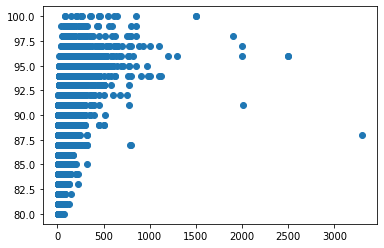

In [14]:
plt.scatter(wine['price'],wine['points'])

Problem 4

In [19]:
wine.isnull().sum()

country        63
points          0
price        8996
province       63
region_1    21247
region_2    79460
winery          0
dtype: int64

In [20]:
wine['price'] = wine['price'].fillna(wine['price'].mean()) # imputing it with mean

In [22]:
wine['price'].isnull().sum()

0

Problem 5

In [28]:
import numpy as np
wine['expense'] = np.where(wine['price']>100,'expensive','inexpensive')

In [29]:
wine

,country,points,price,province,region_1,region_2,winery,expensive,expense
0,Italy,87,35.363389,Sicily & Sardinia,Etna,NaN,Nicosia,inexpensive,inexpensive
1,Portugal,87,15.000000,Douro,NaN,NaN,Quinta dos Avidagos,inexpensive,inexpensive
2,US,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Rainstorm,inexpensive,inexpensive
3,US,87,13.000000,Michigan,Lake Michigan Shore,NaN,St. Julian,inexpensive,inexpensive
4,US,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,inexpensive,inexpensive
...,...,...,...,...,...,...,...,...,...
129966,Germany,90,28.000000,Mosel,NaN,NaN,Dr. H. Thanisch (Erben MÃ¼ller-Burggraef),inexpensive,inexpensive
129967,US,90,75.000000,Oregon,Oregon,Oregon Other,Citation,inexpensive,inexpensive
129968,France,90,30.000000,Alsace,Alsace,NaN,Domaine Gresser,inexpensive,inexpensive
129969,France,90,32.000000,Alsace,Alsace,NaN,Domaine Marcel Deiss,inexpensive,inexpensive


In [40]:
X = wine[['points','country']]

In [41]:
y = wine['price']
'''
# Option 1: 
X = wine[['points','country']]
y = wine['price']

# Option 2:
df = wine.values
X = df[:,[0,1]]
y = df[:,2]

#Option 3:
X = wine.iloc[:,[0,1]]
y = wine.iloc[:,2]
'''

Problem 6

In [52]:
wine_d = pd.get_dummies(wine, columns=["country"])
wine_d

,points,price,province,region_1,region_2,winery,expensive,expense,anamoly,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_China,country_Croatia,country_Cyprus,country_Czech Republic,country_Egypt,country_England,country_France,country_Georgia,country_Germany,country_Greece,country_Hungary,country_India,country_Israel,country_Italy,country_Lebanon,country_Luxembourg,country_Macedonia,country_Mexico,country_Moldova,country_Morocco,country_New Zealand,country_Peru,country_Portugal,country_Romania,country_Serbia,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Ukraine,country_Uruguay
0,87,35.363389,Sicily & Sardinia,Etna,NaN,Nicosia,inexpensive,inexpensive,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,87,15.000000,Douro,NaN,NaN,Quinta dos Avidagos,inexpensive,inexpensive,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Rainstorm,inexpensive,inexpensive,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,87,13.000000,Michigan,Lake Michigan Shore,NaN,St. Julian,inexpensive,inexpensive,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,inexpensive,inexpensive,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,90,28.000000,Mosel,NaN,NaN,Dr. H. Thanisch (Erben MÃ¼ller-Burggraef),inexpensive,inexpensive,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129967,90,75.000000,Oregon,Oregon,Oregon Other,Citation,inexpensive,inexpensive,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
129968,90,30.000000,Alsace,Alsace,NaN,Domaine Gresser,inexpensive,inexpensive,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129969,90,32.000000,Alsace,Alsace,NaN,Domaine Marcel Deiss,inexpensive,inexpensive,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn.ensemble import IsolationForest


X = wine_d[['points','country_US','country_France','country_Italy']]
y = wine_d['price']

iso = IsolationForest()

yhat = iso.fit_predict(X)

wine['anamoly'] = yhat

wine['anamoly'].value_counts()

-1    65564
 1    64407
Name: anamoly, dtype: int64